# 1、精确重心法

In [92]:
import numpy as np
import pandas as pd
import math as m
from math import radians, cos, sin, asin, sqrt

#球面距离函数
def geodistance(lat1,lng1,lat2,lng2):
    lng1, lat1, lng2, lat2 = map(radians, [float(lng1), float(lat1), float(lng2), float(lat2)]) # 经纬度转换成弧度
    dlon=lng2-lng1
    dlat=lat2-lat1
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    distance=2*asin(sqrt(a))*6371*1000 # 地球平均半径，6371km
    distance=round(distance/1000,3)
    return distance

data = pd.read_csv("./data_input/McDonald_info.csv")
#精确重心法迭代
WC = np.array(data['cost_per'])  # 权重系数
WC_latitude = (np.array(data['latitude']) * WC).sum()
WC_longitude = (np.array(data['longitude']) * WC).sum()
x0 = WC_latitude / WC.sum()#初始等效重心
y0 = WC_longitude / WC.sum()#初始等效重心

d_j = data.apply(lambda line:geodistance(line['latitude'],line['longitude'],x0,y0),axis=1).values # 距离
# d_j = np.sqrt((data['latitude'] - x0)**2 + (data['longitude'] - y0)**2).values  # 欧式距离
T0 = (WC * d_j).sum() #计算算总成本
print('初始选点位置：(latitude:{}，longitude:{})'.format(x0,y0))
print('总费用T0：{}'.format(T0))
#选址迭代
theta = 0.01  # 提前结束迭代阈值
for i in range(50):
    WC_j = WC/d_j
    WC_latitude_j = ((np.array(data['latitude']) * WC)/d_j).sum()
    WC_longitude_j = ((np.array(data['longitude']) * WC)/d_j).sum()
    x = WC_latitude_j / WC_j.sum()
    y = WC_longitude_j / WC_j.sum()

    d_j = data.apply(lambda line:geodistance(line['latitude'],line['longitude'],x,y),axis=1).values
    # d_j = np.sqrt((data['latitude'] - x)**2 + (data['longitude'] - y)**2).values # 欧式距离
    T = (WC * d_j).sum()
    print('第{}次迭代后选址点位置：(latitude:{}，longitude:{})'.format(i+1,x,y))
    print('总费用T{}：{}'.format(i+1,T))
    if T0 >= T:
        x0 = x
        y0 = y
        if T0-T <= theta:
            print('提前结束迭代')
            print('最终费用：{}'.format(T))
            print('最终选址点位置：({},{})'.format(x,y))
            break
        T0 = T
else:
    print('最终费用：{}'.format(T0))
    print('最终选址点位置：({},{})'.format(x0,y0))


初始选点位置：(latitude:35.81486256271186，longitude:-90.44021280338983)
总费用T0：95173.913
第1次迭代后选址点位置：(latitude:35.31765619477454，longitude:-87.92868306001331)
总费用T1：93790.723
第2次迭代后选址点位置：(latitude:35.40047837205932，longitude:-86.27816983992578)
总费用T2：93083.00599999996
第3次迭代后选址点位置：(latitude:35.55810142588257，longitude:-85.214742604513)
总费用T3：92748.08699999998
第4次迭代后选址点位置：(latitude:35.71593414098766，longitude:-84.54786288680465)
总费用T4：92584.612
第5次迭代后选址点位置：(latitude:35.853617090255256，longitude:-84.1269294448473)
总费用T5：92493.83499999998
第6次迭代后选址点位置：(latitude:35.96423361719907，longitude:-83.85352643692)
总费用T6：92437.841
第7次迭代后选址点位置：(latitude:36.04869327065002，longitude:-83.66993288454118)
总费用T7：92401.463
第8次迭代后选址点位置：(latitude:36.11141141062384，longitude:-83.54317918542463)
总费用T8：92377.22599999998
第9次迭代后选址点位置：(latitude:36.15737749217147，longitude:-83.45391622009112)
总费用T9：92360.82100000003
第10次迭代后选址点位置：(latitude:36.190897095878256，longitude:-83.39021988868133)
总费用T10：92349.546
第11次迭代后选址点位置：(latitud

# 2、遗传算法

gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   12   | 3.22572E+05 | 8.29541E+05 | 4.83689E+05 | 3.22572E+05 | 1.65744E+05 
 10|  132   | 9.26376E+04 | 1.60777E+05 | 1.21045E+05 | 9.26376E+04 | 2.39148E+04 
 20|  252   | 9.20199E+04 | 9.24083E+04 | 9.21506E+04 | 9.20199E+04 | 1.35220E+02 
 30|  372   | 9.20177E+04 | 9.20192E+04 | 9.20182E+04 | 9.20177E+04 | 4.84328E-01 
 40|  492   | 9.20176E+04 | 9.20177E+04 | 9.20177E+04 | 9.20176E+04 | 1.72004E-02 
 50|  612   | 9.20176E+04 | 9.20177E+04 | 9.20176E+04 | 9.20176E+04 | 2.20322E-03 
 60|  732   | 9.20176E+04 | 9.20176E+04 | 9.20176E+04 | 9.20176E+04 | 1.21335E-03 
 70|  852   | 9.20176E+04 | 9.20176E+04 | 9.20176E+04 | 9.20176E+04 | 1.03749E-03 
 80|  972   | 9.20176E+04 | 9.20176E+04 | 9.20176E+04 | 9.20176E+04 | 1.57233E-03 
 90|  1092  | 9.20176E+04 | 9.20176E+04 | 9.20176E+04 | 9.20176E+04 | 1.29904E-03 
 99|

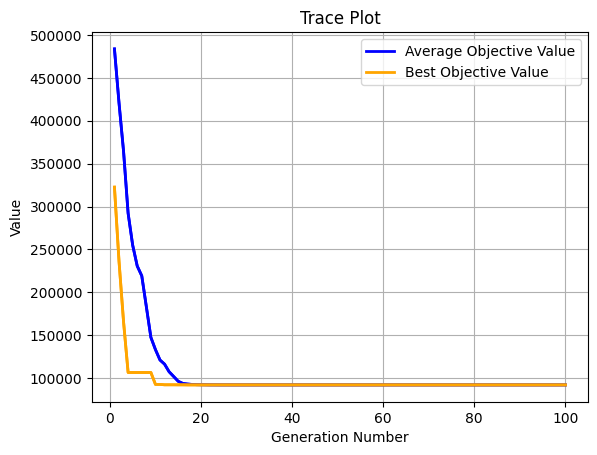

Execution time: 0.8343777656555176 s
Evaluation number: 1200
The best objective value is: 92017.63999999998
The best variables are: 
37.57098021075265	-83.02346369990984	
{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the generation limit.', 'optPop': <geatpy.Population.Population object at 0x7fcbbccf2640>, 'lastPop': <geatpy.Population.Population object at 0x7fcbbccf2430>, 'Vars': array([[ 37.57098021, -83.0234637 ]]), 'ObjV': array([[92017.64]]), 'CV': array([[-142.42901979, -108.0234637 ]]), 'executeTime': 0.8343777656555176, 'nfev': 1200, 'startTime': '2024-03-05 08h-14m-52s', 'endTime': '2024-03-05 08h-14m-53s'}


In [3]:
#搭建遗传算法问题框架，单个设施选址
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
import geatpy as ea  # 遗传算法框架

#球面距离函数
def geodistance(lat1,lng1,lat2,lng2):
    lng1, lat1, lng2, lat2 = map(radians, [float(lng1), float(lat1), float(lng2), float(lat2)]) # 经纬度转换成弧度
    dlon=lng2-lng1
    dlat=lat2-lat1
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    distance=2*asin(sqrt(a))*6371*1000 # 地球平均半径，6371km
    distance=round(distance/1000,3)
    return distance

#选址目标函数
def km1(x,y,data):
    K=0
    for i in range(len(data)):
        K+=geodistance(x,y,data.latitude.values[i],data.longitude.values[i])*data.cost_per.values[i]
    return K 

class MyProblem(ea.Problem):  # 继承Problem父类
    def __init__(self, data):
        name = 'MyProblem'  # 初始化name（函数名称，可以随意设置）
        M = 1  # 初始化M（目标维数）
        maxormins = [1]  # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 2  # 初始化Dim（决策变量维数）
        varTypes = [0] * Dim  # 初始化varTypes（决策变量的类型，元素为0表示对应的变量是连续的；1表示是离散的）
        lb = [-90, -180]  # 决策变量下界
        ub = [90, 180]  # 决策变量上界
        lbin = [1,1]  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1,1]  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        self.data = data
        # 调用父类构造方法完成实例化
        super().__init__(name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
    def evalVars(self, Vars):  # 目标函数
        x1 = Vars[:, [0]]
        x2 = Vars[:, [1]]
        f = np.array([km1(x1[i], x2[i], self.data) for i in range(len(x1))]).reshape(-1, 1)
        ###设置约束范围
        # CV中正值表示违反约束，0或负值表示满足约束
        CV = np.hstack([x1- 180, x2 - 180])
        return f, CV
    def calReferObjV(self):  # 设定目标函数参考值（本问题目标函数参考值设定为理论最优值）可不设置，对结果无影响
        referenceObjV = np.array([[100000]])
        return referenceObjV
    
#遗传算法求解
if __name__ == '__main__':
    data = pd.read_csv("./data_input/McDonald_info.csv")
    # 实例化问题对象
    problem = MyProblem(data)
    # 构建算法
    algorithm = ea.soea_DE_rand_1_bin_templet(problem,
                                              ea.Population(Encoding='RI', NIND=12), #NIND:种群数量
                                              MAXGEN=100,  # 最大进化代数。
                                              logTras=10)  # 表示每隔多少代记录一次日志信息，0表示不记录。
    algorithm.mutOper.F = 0.5  # 差分进化中的参数F
    algorithm.recOper.XOVR = 0.7  # 重组概率
    # 求解
    res = ea.optimize(algorithm, verbose=True, drawing=1, outputMsg=True, drawLog=False, saveFlag=False)
    print(res)